In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("Dataset_Clientes_Colombia.xlsx", engine='openpyxl')

In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
  ID Compra    Nombre   Apellido Electrodoméstico  Cantidad  Valor Unitario  \
0  CL-00001    Marcia      PARRA           Nevera       5.0         1800000   
1  CL-00002   Alfonso       ROMA          Plancha       1.0          150000   
2  CL-00003       NaN     DUE%AS  Horno eléctrico       3.0          500000   
3  CL-00004   Gonzalo  SEBASTIÁN        Licuadora       3.0          250000   
4  CL-00005  Ambrosio       PRAT         Lavadora       5.0         1500000   

   Valor Total Fecha Compra Hora Compra  
0      9000000   2023-07-12    03:27:54  
1       150000   2023-01-16    04:34:05  
2      1500000   2022-09-21    20:18:45  
3       750000   2024-05-23    15:39:00  
4      7500000   2022-09-08    13:57:58  


In [ ]:
#Nulos
total_nulos = df.isnull().sum()
print("\nCantidad de valores nulos por columna:")
total_nulos


Cantidad de valores nulos por columna:


,0
ID Compra,0
Nombre,21
Apellido,20
Electrodoméstico,21
Cantidad,10
Valor Unitario,0
Valor Total,0
Fecha Compra,0
Hora Compra,0


In [ ]:
#Identificar y contar valores vacíos (celdas con strings vacíos o espacios)
valores_vacios = df.isnull().any()
valores_vacios

,0
ID Compra,False
Nombre,True
Apellido,True
Electrodoméstico,True
Cantidad,True
Valor Unitario,False
Valor Total,False
Fecha Compra,False
Hora Compra,False


In [ ]:
#Identificar y contar filas duplicadas
duplicados_con_id = df.duplicated().sum()
duplicados_sin_id = df.drop(columns=['ID Compra']).duplicated().sum()
print(f"\nFilas duplicadas considerando ID: {duplicados_con_id}")
print(f"Filas duplicadas sin considerar ID: {duplicados_sin_id}")


Filas duplicadas considerando ID: 0
Filas duplicadas sin considerar ID: 21


In [ ]:
#Verificar formatos inconsistentes
# Fecha
df['Fecha Compra'] = pd.to_datetime(df['Fecha Compra'], errors='coerce')
fechas_invalidas = df['Fecha Compra'].isnull().sum()
print(f"\nCantidad de fechas inválidas: {fechas_invalidas}")


Cantidad de fechas inválidas: 150


In [ ]:
#Nombres
def check_nombre_apellido(nombre):
    if not isinstance(nombre, str) or pd.isna(nombre):
        return True
    return not nombre.replace(" ", "").isalpha() or not nombre.istitle()

nombres_invalidos = df['Nombre'].apply(check_nombre_apellido).sum()
apellidos_invalidos = df['Apellido'].apply(check_nombre_apellido).sum()

print(f"\nCantidad de nombres inválidos: {nombres_invalidos}")
print(f"Cantidad de apellidos inválidos: {apellidos_invalidos}")


Cantidad de nombres inválidos: 651
Cantidad de apellidos inválidos: 11275


In [ ]:
#valores numéricos en Cantidad, Valor Unitario y Valor Total
cantidad_invalidos = (df['Cantidad'] <= 0).sum()
valor_unitario_invalidos = (df['Valor Unitario'] <= 0).sum()
valor_total_invalidos = (df['Valor Total'] != df['Cantidad'] * df['Valor Unitario']).sum()

print(f"\nCantidad de valores inválidos en 'Cantidad': {cantidad_invalidos}")
print(f"Cantidad de valores inválidos en 'Valor Unitario': {valor_unitario_invalidos}")
print(f"Cantidad de inconsistencias en 'Valor Total': {valor_total_invalidos}")


Cantidad de valores inválidos en 'Cantidad': 0
Cantidad de valores inválidos en 'Valor Unitario': 0
Cantidad de inconsistencias en 'Valor Total': 10


In [ ]:
#Limpiar nombres y apellidos
def clean_nombre_apellido(nombre):
    if pd.isna(nombre) or not isinstance(nombre, str):
        return "Desconocido"
    return nombre.strip().title()

df['Nombre'] = df['Nombre'].apply(clean_nombre_apellido)
df['Apellido'] = df['Apellido'].apply(clean_nombre_apellido)

In [ ]:
#Fecha
df['Fecha Compra'] = pd.to_datetime(df['Fecha Compra'], errors='coerce')

In [ ]:
# Imputación de valores nulos
df['Cantidad'] = df['Cantidad'].fillna(df['Cantidad'].median())
df['Valor Unitario'] = df['Valor Unitario'].fillna(df['Valor Unitario'].median())

# Recalcular el valor total después de imputar valores
df['Valor Total'] = df['Cantidad'] * df['Valor Unitario']


In [ ]:
# 4. Eliminar duplicados reales
df.drop_duplicates(inplace=True)

In [ ]:
# Asegurar que 'Fecha Compra' esté en formato de fecha
df['Fecha Compra'] = pd.to_datetime(df['Fecha Compra'], errors='coerce')

# Extraer año y mes en formato entero
df['Año de compra'] = df['Fecha Compra'].dt.year.astype('Int64')
df['Mes de compra'] = df['Fecha Compra'].dt.month.astype('Int64')

print("Año y Mes de Compra:")
print(df[['Fecha Compra', 'Año de compra', 'Mes de compra']].head())

# Asegurar que 'Hora Compra' esté en formato correcto
df['Hora Compra'] = pd.to_datetime(df['Hora Compra'], format='%H:%M:%S', errors='coerce').dt.time

# Extraer solo la hora como número entero
df['Hora de compra'] = pd.to_datetime(df['Hora Compra'], format='%H:%M:%S', errors='coerce').dt.hour.astype('Int64')

print("\nHora de Compra:")
print(df[['Hora Compra', 'Hora de compra']].head())



Año y Mes de Compra:
  Fecha Compra  Año de compra  Mes de compra
0   2023-07-12           2023              7
1   2023-01-16           2023              1
2   2022-09-21           2022              9
3   2024-05-23           2024              5
4   2022-09-08           2022              9

Hora de Compra:
  Hora Compra  Hora de compra
0    03:27:54               3
1    04:34:05               4
2    20:18:45              20
3    15:39:00              15
4    13:57:58              13


In [ ]:
#Clasificar electrodomésticos por categoría
def clasificar_electrodomestico(producto):
    categorias = {
        'Cocina': ['Nevera', 'Horno', 'Microondas', 'Licuadora'],
        'Confort': ['Aire Acondicionado', 'Ventilador', 'Calefactor'],
        'Limpieza': ['Lavadora', 'Aspiradora'],
        'Entretenimiento': ['Televisor', 'Equipo de Sonido']
    }
    for categoria, productos in categorias.items():
        if producto in productos:
            return categoria
    return 'Otros'

df['Categoría Electrodoméstico'] = df['Electrodoméstico'].apply(clasificar_electrodomestico)


In [ ]:
#Guardar el nuevo archivo Excel
df.to_excel("Dataset_Clientes_Colombia_Transformado.xlsx", index=False)

print("\nTransformaciones completadas y archivo guardado como 'Dataset_Clientes_Colombia_Transformado.xlsx'")


Transformaciones completadas y archivo guardado como 'Dataset_Clientes_Colombia_Transformado.xlsx'


In [ ]:
# 1. ¿Cuál es el electrodoméstico más vendido por cantidad?
mas_vendido = df.groupby('Electrodoméstico')['Cantidad'].sum().idxmax()
cantidad_mas_vendido = df.groupby('Electrodoméstico')['Cantidad'].sum().max()
print(f"1. Electrodoméstico más vendido: {mas_vendido} ({cantidad_mas_vendido} unidades)")

1. Electrodoméstico más vendido: Plancha (3517.0 unidades)


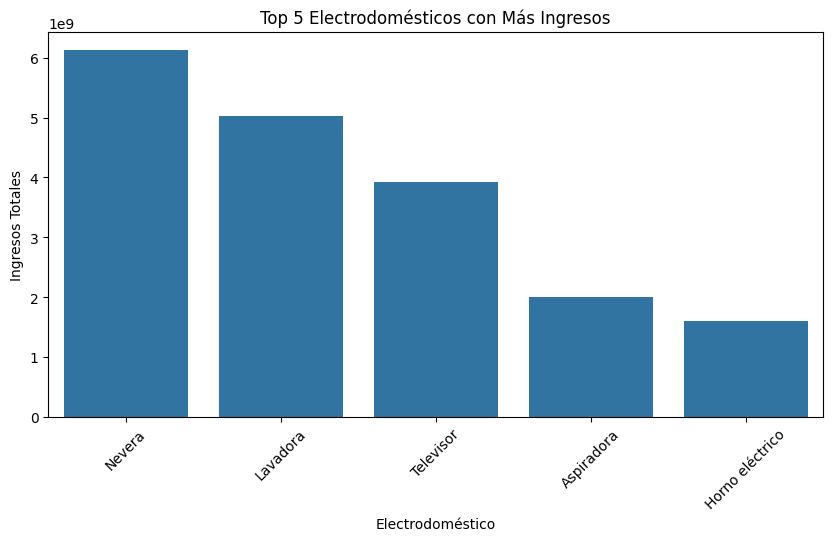

In [ ]:
# 2. ¿Cuál generó más ingresos (Valor Total)?
mas_ingresos = df.groupby('Electrodoméstico')['Valor Total'].sum().idxmax()
ingresos_mas_ingresos = df.groupby('Electrodoméstico')['Valor Total'].sum().max()
plt.figure(figsize=(10, 5))
top_ingresos = df.groupby('Electrodoméstico')['Valor Total'].sum().nlargest(5)
sns.barplot(x=top_ingresos.index, y=top_ingresos.values)
plt.title("Top 5 Electrodomésticos con Más Ingresos")
plt.ylabel("Ingresos Totales")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3. ¿Cuál es el ticket promedio por compra?
ticket_promedio = df['Valor Total'].mean()
print(f"3. Ticket promedio por compra: ${ticket_promedio:,.2f}")

3. Ticket promedio por compra: $2,050,895.79


<ipython-input-20-c4783a5f6e76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Año de compra'], palette='viridis')


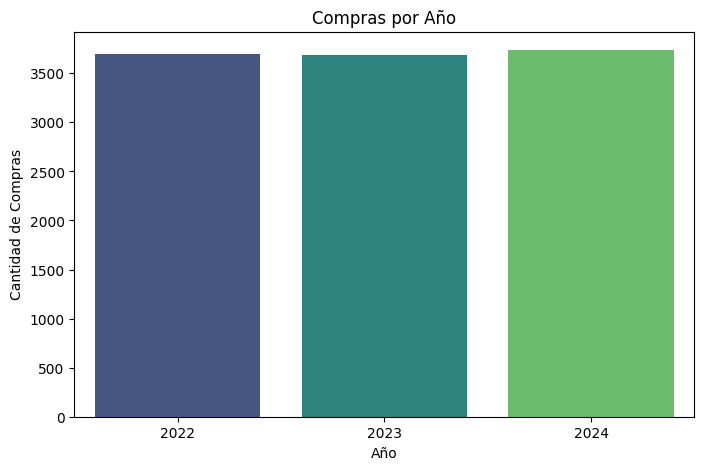

In [ ]:
# 4. ¿Cuántas compras se realizaron por año?
compras_por_anio = df['Año de compra'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Año de compra'], palette='viridis')
plt.title("Compras por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Compras")
plt.show()

<ipython-input-21-1e1802db03bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Mes de compra'], palette='coolwarm')


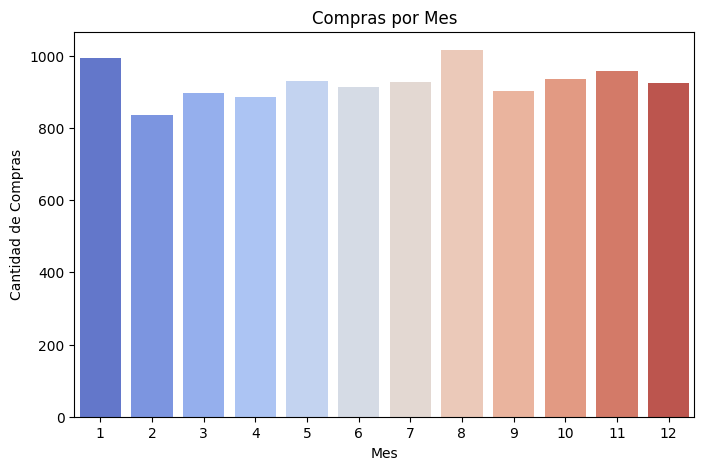

In [ ]:
# 5. ¿Y por mes?
compras_por_mes = df['Mes de compra'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Mes de compra'], palette='coolwarm')
plt.title("Compras por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Compras")
plt.show()

In [ ]:
# 6. ¿Cuál es la hora del día con más compras?
hora_mas_compras = df['Hora de compra'].value_counts().idxmax()
print(f"6. Hora con más compras: {hora_mas_compras}:00 hrs")

6. Hora con más compras: 12:00 hrs


In [ ]:
# 7. ¿Qué cliente compró más unidades?
cliente_top = df.groupby(['Nombre', 'Apellido'])['Cantidad'].sum().idxmax()
unidades_cliente_top = df.groupby(['Nombre', 'Apellido'])['Cantidad'].sum().max()
print(f"7. Cliente que compró más unidades: {cliente_top} ({unidades_cliente_top} unidades)")

7. Cliente que compró más unidades: ('Desconocido', 'Desconocido') (66.0 unidades)


In [ ]:
# 8. ¿Cuántas compras tienen un valor total mayor a $5.000.000?
compras_mayores_5m = df[df['Valor Total'] > 5000000].shape[0]
print(f"8. Compras con valor total > $5M: {compras_mayores_5m}")

8. Compras con valor total > $5M: 1327


In [ ]:
# 9. ¿Cuál es la media y mediana del Valor Unitario?
media_valor_unitario = df['Valor Unitario'].mean()
mediana_valor_unitario = df['Valor Unitario'].median()
print(f"9. Media del Valor Unitario: ${media_valor_unitario:,.2f}")
print(f"   Mediana del Valor Unitario: ${mediana_valor_unitario:,.2f}")

9. Media del Valor Unitario: $687,614.19
   Mediana del Valor Unitario: $400,000.00


In [ ]:
# 10. ¿Cuántas compras no tienen registrado el nombre del cliente?
compras_sin_nombre = df[df['Nombre'].isna() | (df['Nombre'] == "Desconocido")].shape[0]
print(f"10. Compras sin nombre registrado: {compras_sin_nombre}")

10. Compras sin nombre registrado: 21


In [ ]:
# 11. ¿Cuál es el producto más común entre las compras duplicadas?
duplicados = df[df.duplicated(subset=['Electrodoméstico', 'Cantidad', 'Valor Unitario'], keep=False)]
producto_duplicado = duplicados['Electrodoméstico'].mode()[0]
print(f"11. Producto más común en compras duplicadas: {producto_duplicado}")

11. Producto más común en compras duplicadas: Plancha


In [ ]:
# 12. ¿Hay alguna relación entre la cantidad comprada y el valor total?
correlacion = df['Cantidad'].corr(df['Valor Total'])
print(f"12. Correlación entre cantidad y valor total: {correlacion:.2f}")

12. Correlación entre cantidad y valor total: 0.47


In [ ]:
# 13. ¿Cuántas categorías de electrodomésticos hay?
categorias_unicas = df['Categoría Electrodoméstico'].nunique()
print(f"13. Categorías de electrodomésticos: {categorias_unicas}")

13. Categorías de electrodomésticos: 5


In [ ]:
# 14. ¿Qué categoría vende más?
categoria_top = df.groupby('Categoría Electrodoméstico')['Cantidad'].sum().idxmax()
print(f"14. Categoría con más ventas: {categoria_top}")

14. Categoría con más ventas: Cocina


In [ ]:
# 15. ¿Hay estacionalidad en las compras? ¿En qué meses se compra más?
mes_mas_compras = df['Mes de compra'].value_counts().idxmax()
print(f"15. Mes con más compras: {mes_mas_compras}")

15. Mes con más compras: 8


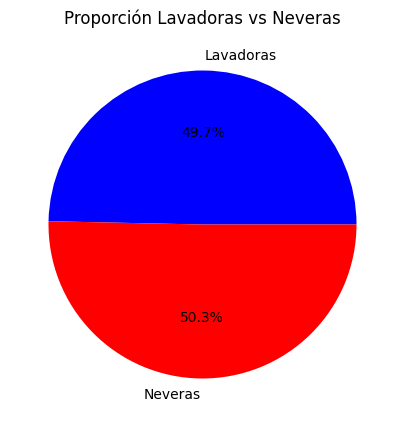

Análisis y visualización de datos completados.


In [ ]:
# 16. ¿Cuál es la proporción entre compras de lavadoras y neveras?
lavadoras = df[df['Electrodoméstico'].str.contains('Lavadora', na=False)]['Cantidad'].sum()
neveras = df[df['Electrodoméstico'].str.contains('Nevera', na=False)]['Cantidad'].sum()
proporcion_lavadoras_neveras = lavadoras / neveras if neveras > 0 else 0
plt.figure(figsize=(5, 5))
lavadoras = df[df['Electrodoméstico'].str.contains('Lavadora', na=False)]['Cantidad'].sum()
neveras = df[df['Electrodoméstico'].str.contains('Nevera', na=False)]['Cantidad'].sum()
plt.pie([lavadoras, neveras], labels=['Lavadoras', 'Neveras'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Proporción Lavadoras vs Neveras")
plt.show()

print("Análisis y visualización de datos completados.")

In [ ]:
# 17. ¿Cuántas compras hay de productos de cocina vs. climatización?
compras_cocina = df[df['Categoría Electrodoméstico'] == 'Cocina']['Cantidad'].sum()
compras_climatizacion = df[df['Categoría Electrodoméstico'] == 'Confort']['Cantidad'].sum()
print(f"17. Compras Cocina: {compras_cocina}, Compras Climatización: {compras_climatizacion}")

17. Compras Cocina: 10239.0, Compras Climatización: 3243.0


In [ ]:
# 18. ¿Cuántos productos se vendieron en total?
productos_totales = df['Cantidad'].sum()
print(f"18. Total de productos vendidos: {productos_totales}")

18. Total de productos vendidos: 33594.0


In [ ]:
# 19. ¿Cuál es el promedio de productos por compra?
productos_por_compra = df['Cantidad'].mean()
print(f"19. Promedio de productos por compra: {productos_por_compra:.2f}")

19. Promedio de productos por compra: 2.98


In [ ]:
# 20. ¿Qué porcentaje de las compras tiene más de una unidad?
compras_mas_de_una = df[df['Cantidad'] > 1].shape[0]
total_compras = df.shape[0]
porcentaje_mas_de_una = (compras_mas_de_una / total_compras) * 100
print(f"20. Porcentaje de compras con más de una unidad: {porcentaje_mas_de_una:.2f}%")

20. Porcentaje de compras con más de una unidad: 79.59%


In [ ]:
# 1. ¿Qué productos debería promocionar la empresa en temporadas altas?
compras_por_mes = df['Mes de compra'].value_counts().sort_index()
mes_mas_compras = compras_por_mes.idxmax()
mas_vendido = df.groupby('Electrodoméstico')['Cantidad'].sum().idxmax()
print(f"Mes con más compras: {mes_mas_compras}")
print(f"Producto recomendado para promocionar: {mas_vendido}")

Mes con más compras: 8
Producto recomendado para promocionar: Plancha


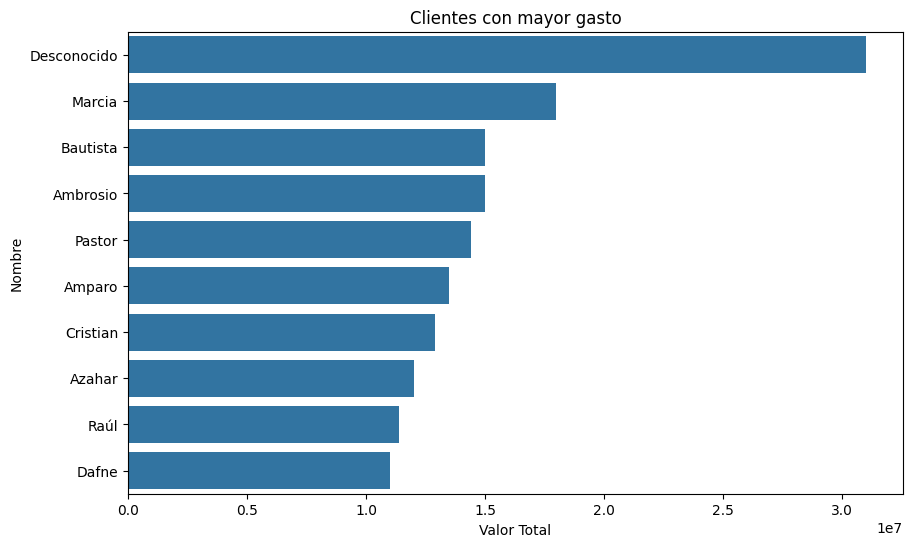

In [ ]:
# 2. ¿Hay clientes frecuentes o con tickets altos a los que se podría fidelizar?
clientes_frecuentes = df.groupby(['Nombre', 'Apellido'])['Valor Total'].sum().reset_index()
clientes_frecuentes = clientes_frecuentes.sort_values(by='Valor Total', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=clientes_frecuentes, x='Valor Total', y='Nombre', orient='h')
plt.title('Clientes con mayor gasto')
plt.show()

In [ ]:
# 3. ¿Vale la pena mantener todos los productos en el portafolio?
ventas_por_producto = df.groupby('Electrodoméstico')['Cantidad'].sum().sort_values()
print("Productos con menos ventas:")
print(ventas_por_producto.head(5))

Productos con menos ventas:
Electrodoméstico
Horno eléctrico    3194.0
Ventilador         3243.0
Televisor          3276.0
Aspiradora         3346.0
Lavadora           3355.0
Name: Cantidad, dtype: float64


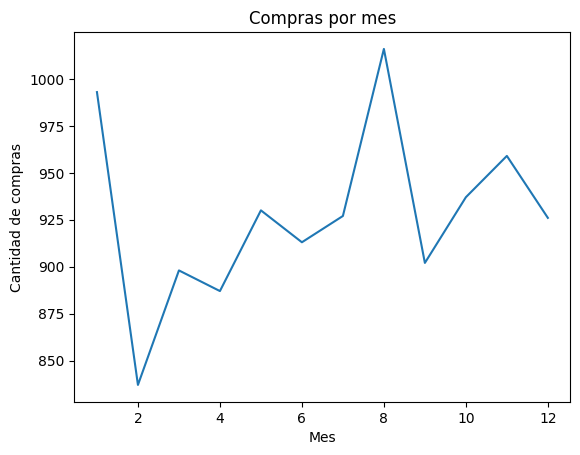

In [ ]:
# 4. ¿Debería la empresa reforzar su logística en ciertos meses?
sns.lineplot(x=compras_por_mes.index, y=compras_por_mes.values)
plt.title("Compras por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de compras")
plt.show()


In [ ]:
# 5. ¿Hay productos que parecen propensos a errores de registro?
duplicados = df[df.duplicated(subset=['Electrodoméstico', 'Cantidad', 'Valor Unitario'], keep=False)]
producto_duplicado = duplicados['Electrodoméstico'].mode()[0]
print(f"Producto más común en compras duplicadas: {producto_duplicado}")

Producto más común en compras duplicadas: Plancha


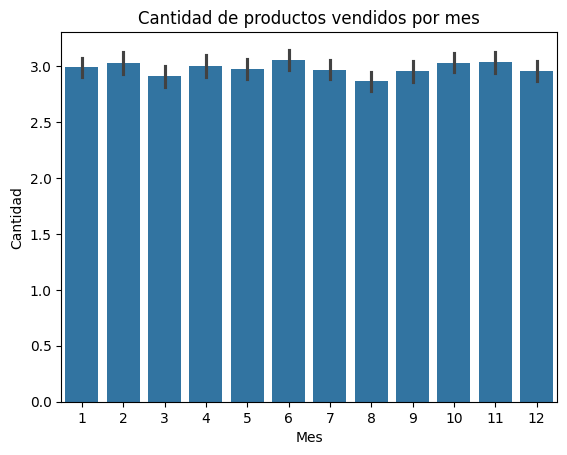

In [ ]:
# 6. ¿Se puede usar esta información para proyecciones de stock?
sns.barplot(x=df['Mes de compra'], y=df['Cantidad'])
plt.title("Cantidad de productos vendidos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
# 7. ¿Qué productos podrían formar parte de combos?
categorias_top = df.groupby('Categoría Electrodoméstico')['Cantidad'].sum().sort_values(ascending=False)
print("Categorías más vendidas para posibles combos:")
print(categorias_top.head(3))

Categorías más vendidas para posibles combos:
Categoría Electrodoméstico
Cocina      10239.0
Otros       10135.0
Limpieza     6701.0
Name: Cantidad, dtype: float64


In [ ]:
# 8. ¿Dónde hay oportunidades de ventas cruzadas?
productos_mas_vendidos = df['Electrodoméstico'].value_counts().head(5)
print("Productos más comprados juntos podrían formar ventas cruzadas:")
print(productos_mas_vendidos)

Productos más comprados juntos podrían formar ventas cruzadas:
Electrodoméstico
Plancha       1170
Microondas    1156
Licuadora     1153
Nevera        1135
Lavadora      1132
Name: count, dtype: int64


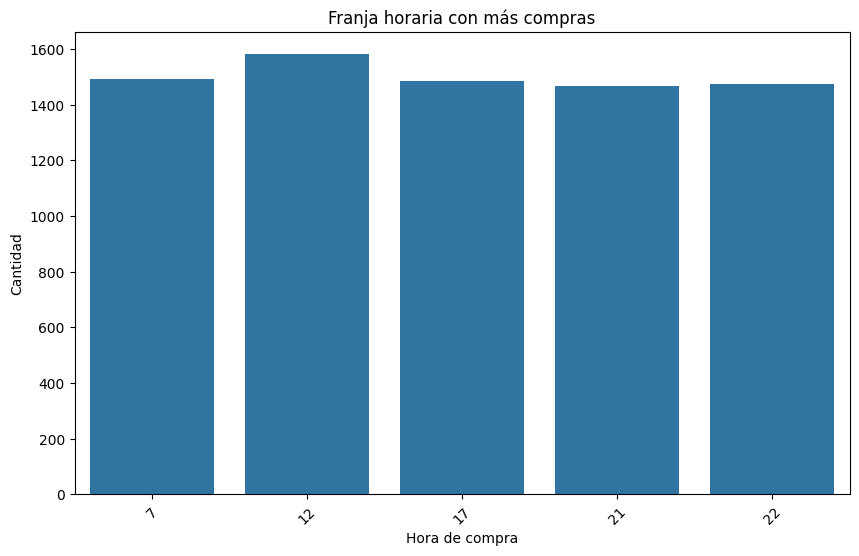

In [ ]:
# 9. ¿Qué franjas horarias podrían usarse para promociones digitales?
horas_populares = df.groupby('Hora de compra')['Cantidad'].sum().reset_index()
horas_populares = horas_populares.sort_values(by='Cantidad', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=horas_populares, x='Hora de compra', y='Cantidad')
plt.title('Franja horaria con más compras')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 10. ¿Se podrían automatizar alertas para compras inusuales?
compras_altas = df[df['Valor Total'] > 5000000]
print("Compras con valores inusuales:")
print(compras_altas[['Nombre', 'Apellido', 'Valor Total']])

Compras con valores inusuales:
         Nombre    Apellido  Valor Total
0        Marcia       Parra    9000000.0
4      Ambrosio        Prat    7500000.0
5        Roldán       Elías    9000000.0
20     Florinda       Cases    6000000.0
22       Salomé         Ros    9000000.0
...         ...         ...          ...
11233    Isidro       Duran    6000000.0
11250    Marcia       Parra    9000000.0
11254  Ambrosio        Prat    7500000.0
11267    Azahar    Figueroa    6000000.0
11272  Bautista  Villaverde    7500000.0

[1327 rows x 3 columns]
